In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\aravind\\Desktop\\VUMONIC DATALABS\\time_series_covid19_confirmed_global.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [4]:
df.shape

(266, 178)

In [5]:
if len(df['Country/Region'].unique()) == len(df.index):
    print("No duplicate rows")
else:
    print("Duplicate rows present ")
                                    

Duplicate rows present 


In [6]:
X=df.iloc[:,1:]

In [7]:
X.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 177 entries, Country/Region to 7/13/20
dtypes: float64(2), int64(174), object(1)
memory usage: 368.0+ KB


In [9]:
X.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,4.236509e+04,4.305337e+04,4.368457e+04,4.447219e+04,4.526872e+04,4.612225e+04,4.698672e+04,4.781168e+04,4.853518e+04,4.926463e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,2.115818e+05,2.152661e+05,2.185190e+05,2.232169e+05,2.278585e+05,2.327247e+05,2.378347e+05,2.425360e+05,2.467222e+05,2.508038e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.075000e+02,2.075000e+02,2.092500e+02,2.285000e+02,2.347500e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.223500e+03,1.232000e+03,1.234000e+03,1.237000e+03,1.268500e+03,1.280500e+03,1.280500e+03,1.344500e+03,1.364500e+03,1.383500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.194550e+04,1.207925e+04,1.216600e+04,1.231225e+04,1.248650e+04,1.262450e+04,1.272250e+04,1.283775e+04,1.298425e+04,1.318775e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,2.841241e+06,2.891124e+06,2.936077e+06,2.996098e+06,3.054699e+06,3.117946e+06,3.184573e+06,3.245925e+06,3.304942e+06,3.364157e+06


In [10]:
#plt.figure(figsize=[12,9])
#sb.heatmap(X.corr(),annot=True)
#plt.show()

In [11]:
#sb.pairplot(X)

In [12]:
X.isnull().sum()

Country/Region    0
Lat               0
Long              0
1/22/20           0
1/23/20           0
                 ..
7/9/20            0
7/10/20           0
7/11/20           0
7/12/20           0
7/13/20           0
Length: 177, dtype: int64

In [13]:
X.shape

(266, 177)

In [14]:
#training the given data

train_data=X[0:250]
train_data

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Canada,64.282300,-135.000000,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
246,Kosovo,42.602636,20.902977,0,0,0,0,0,0,0,...,3064,3356,3508,3703,3886,4100,4307,4715,4931,5118
247,Burma,21.916200,95.956000,0,0,0,0,0,0,0,...,313,313,316,316,317,321,326,330,331,336
248,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3


In [15]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 177 entries, Country/Region to 7/13/20
dtypes: float64(2), int64(174), object(1)
memory usage: 345.8+ KB
None


In [16]:
#Resetting the index of the train data
train_data.reset_index(inplace=True,drop=True)
train_data

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Canada,64.282300,-135.000000,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
246,Kosovo,42.602636,20.902977,0,0,0,0,0,0,0,...,3064,3356,3508,3703,3886,4100,4307,4715,4931,5118
247,Burma,21.916200,95.956000,0,0,0,0,0,0,0,...,313,313,316,316,317,321,326,330,331,336
248,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3


<function matplotlib.pyplot.show(*args, **kw)>

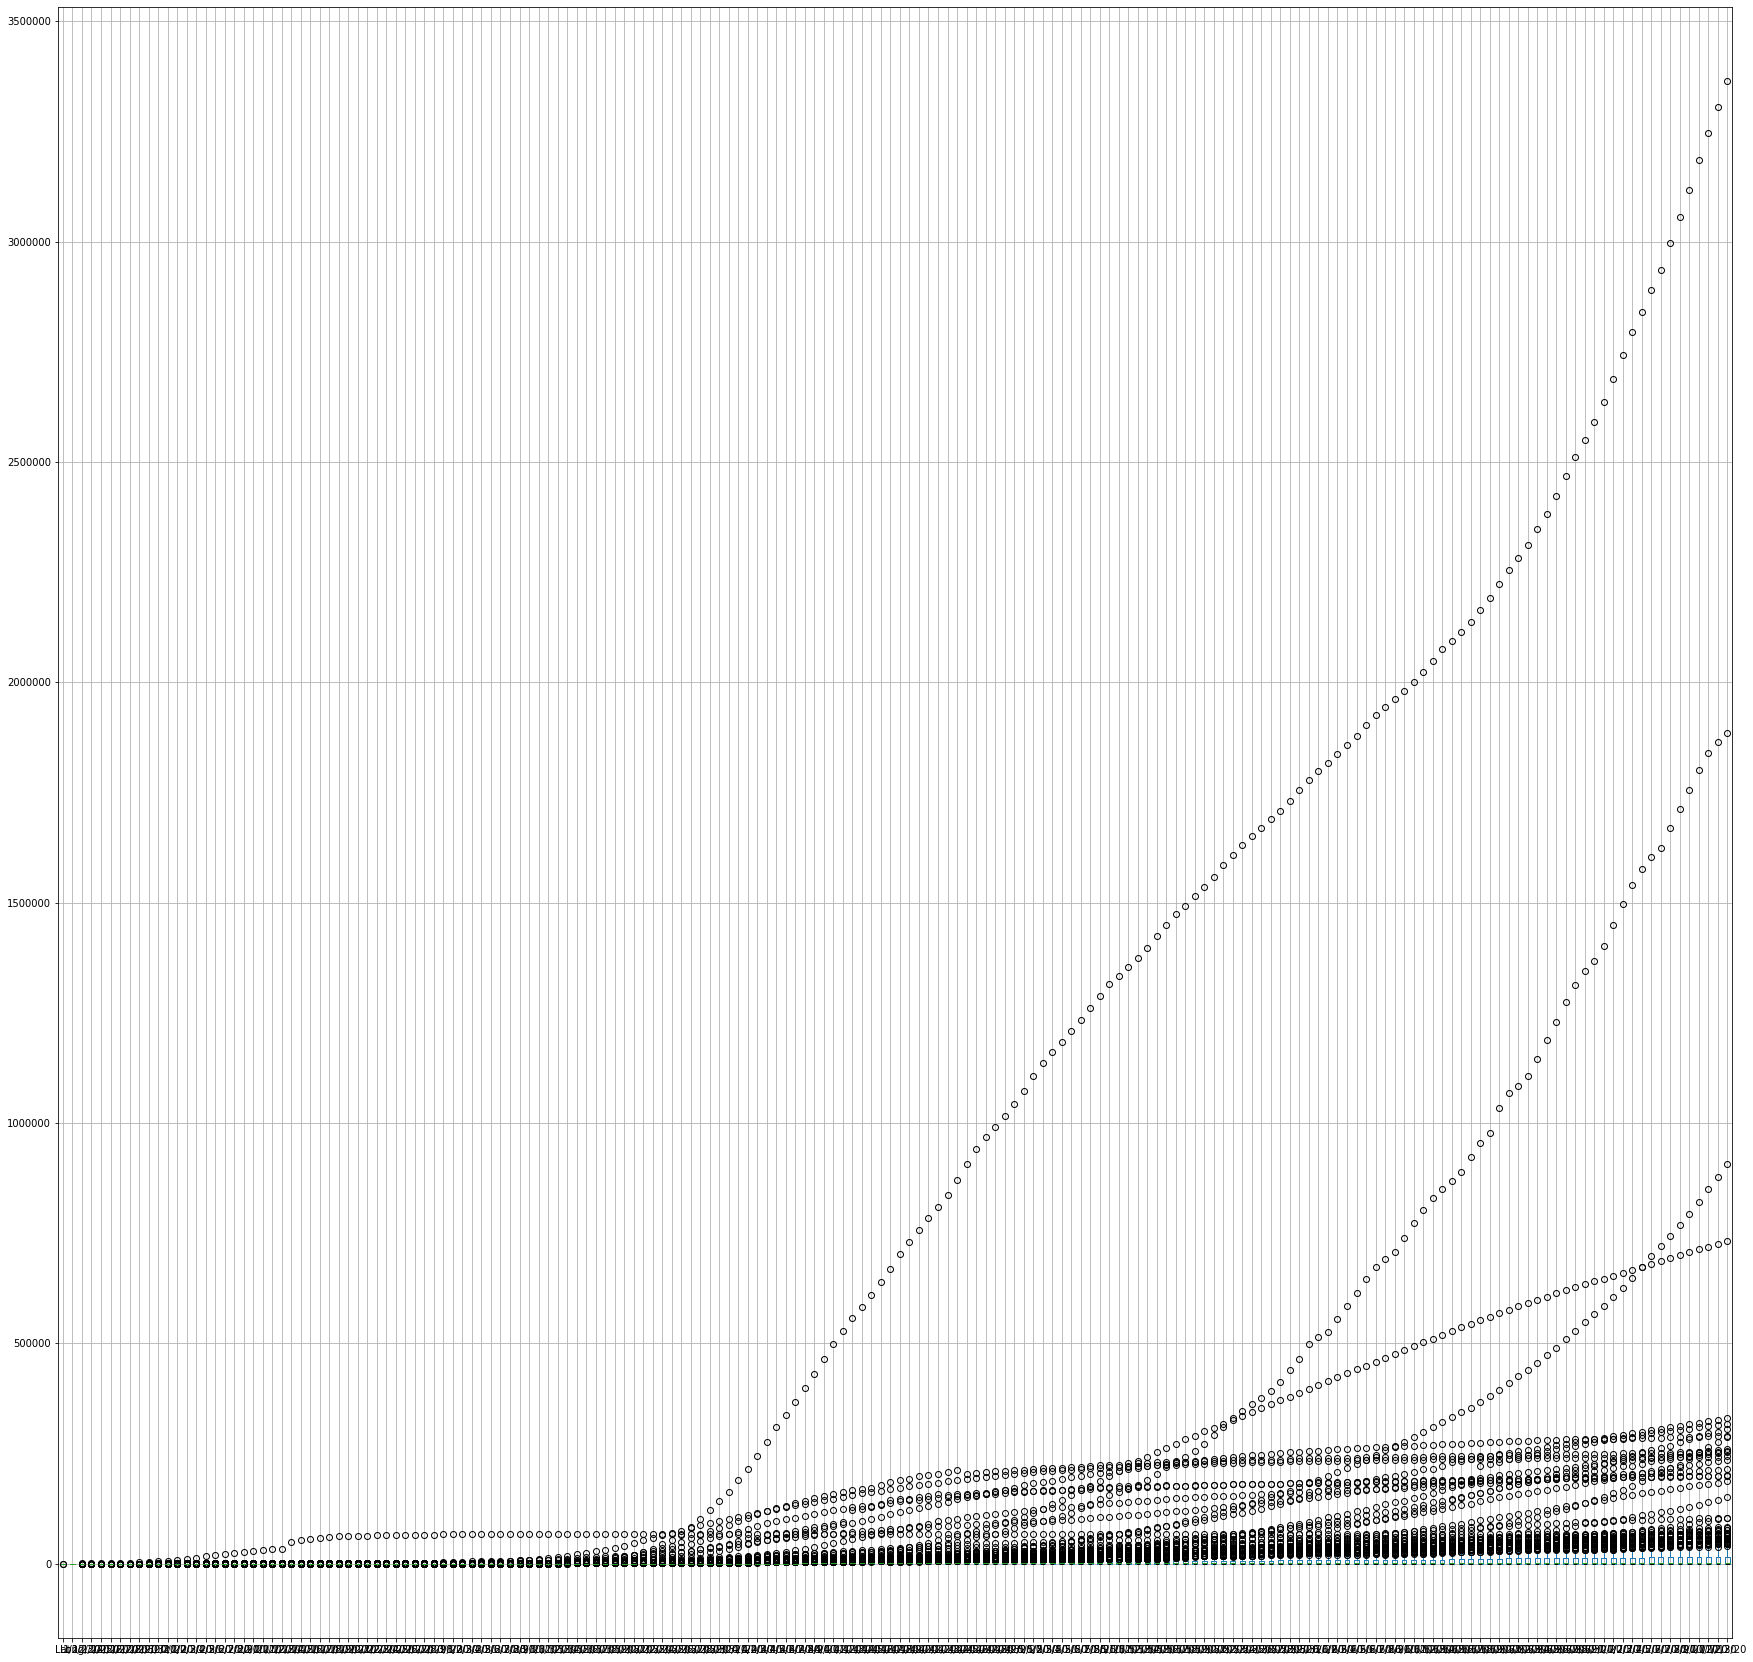

In [17]:
train_data.boxplot(figsize=(30,30))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

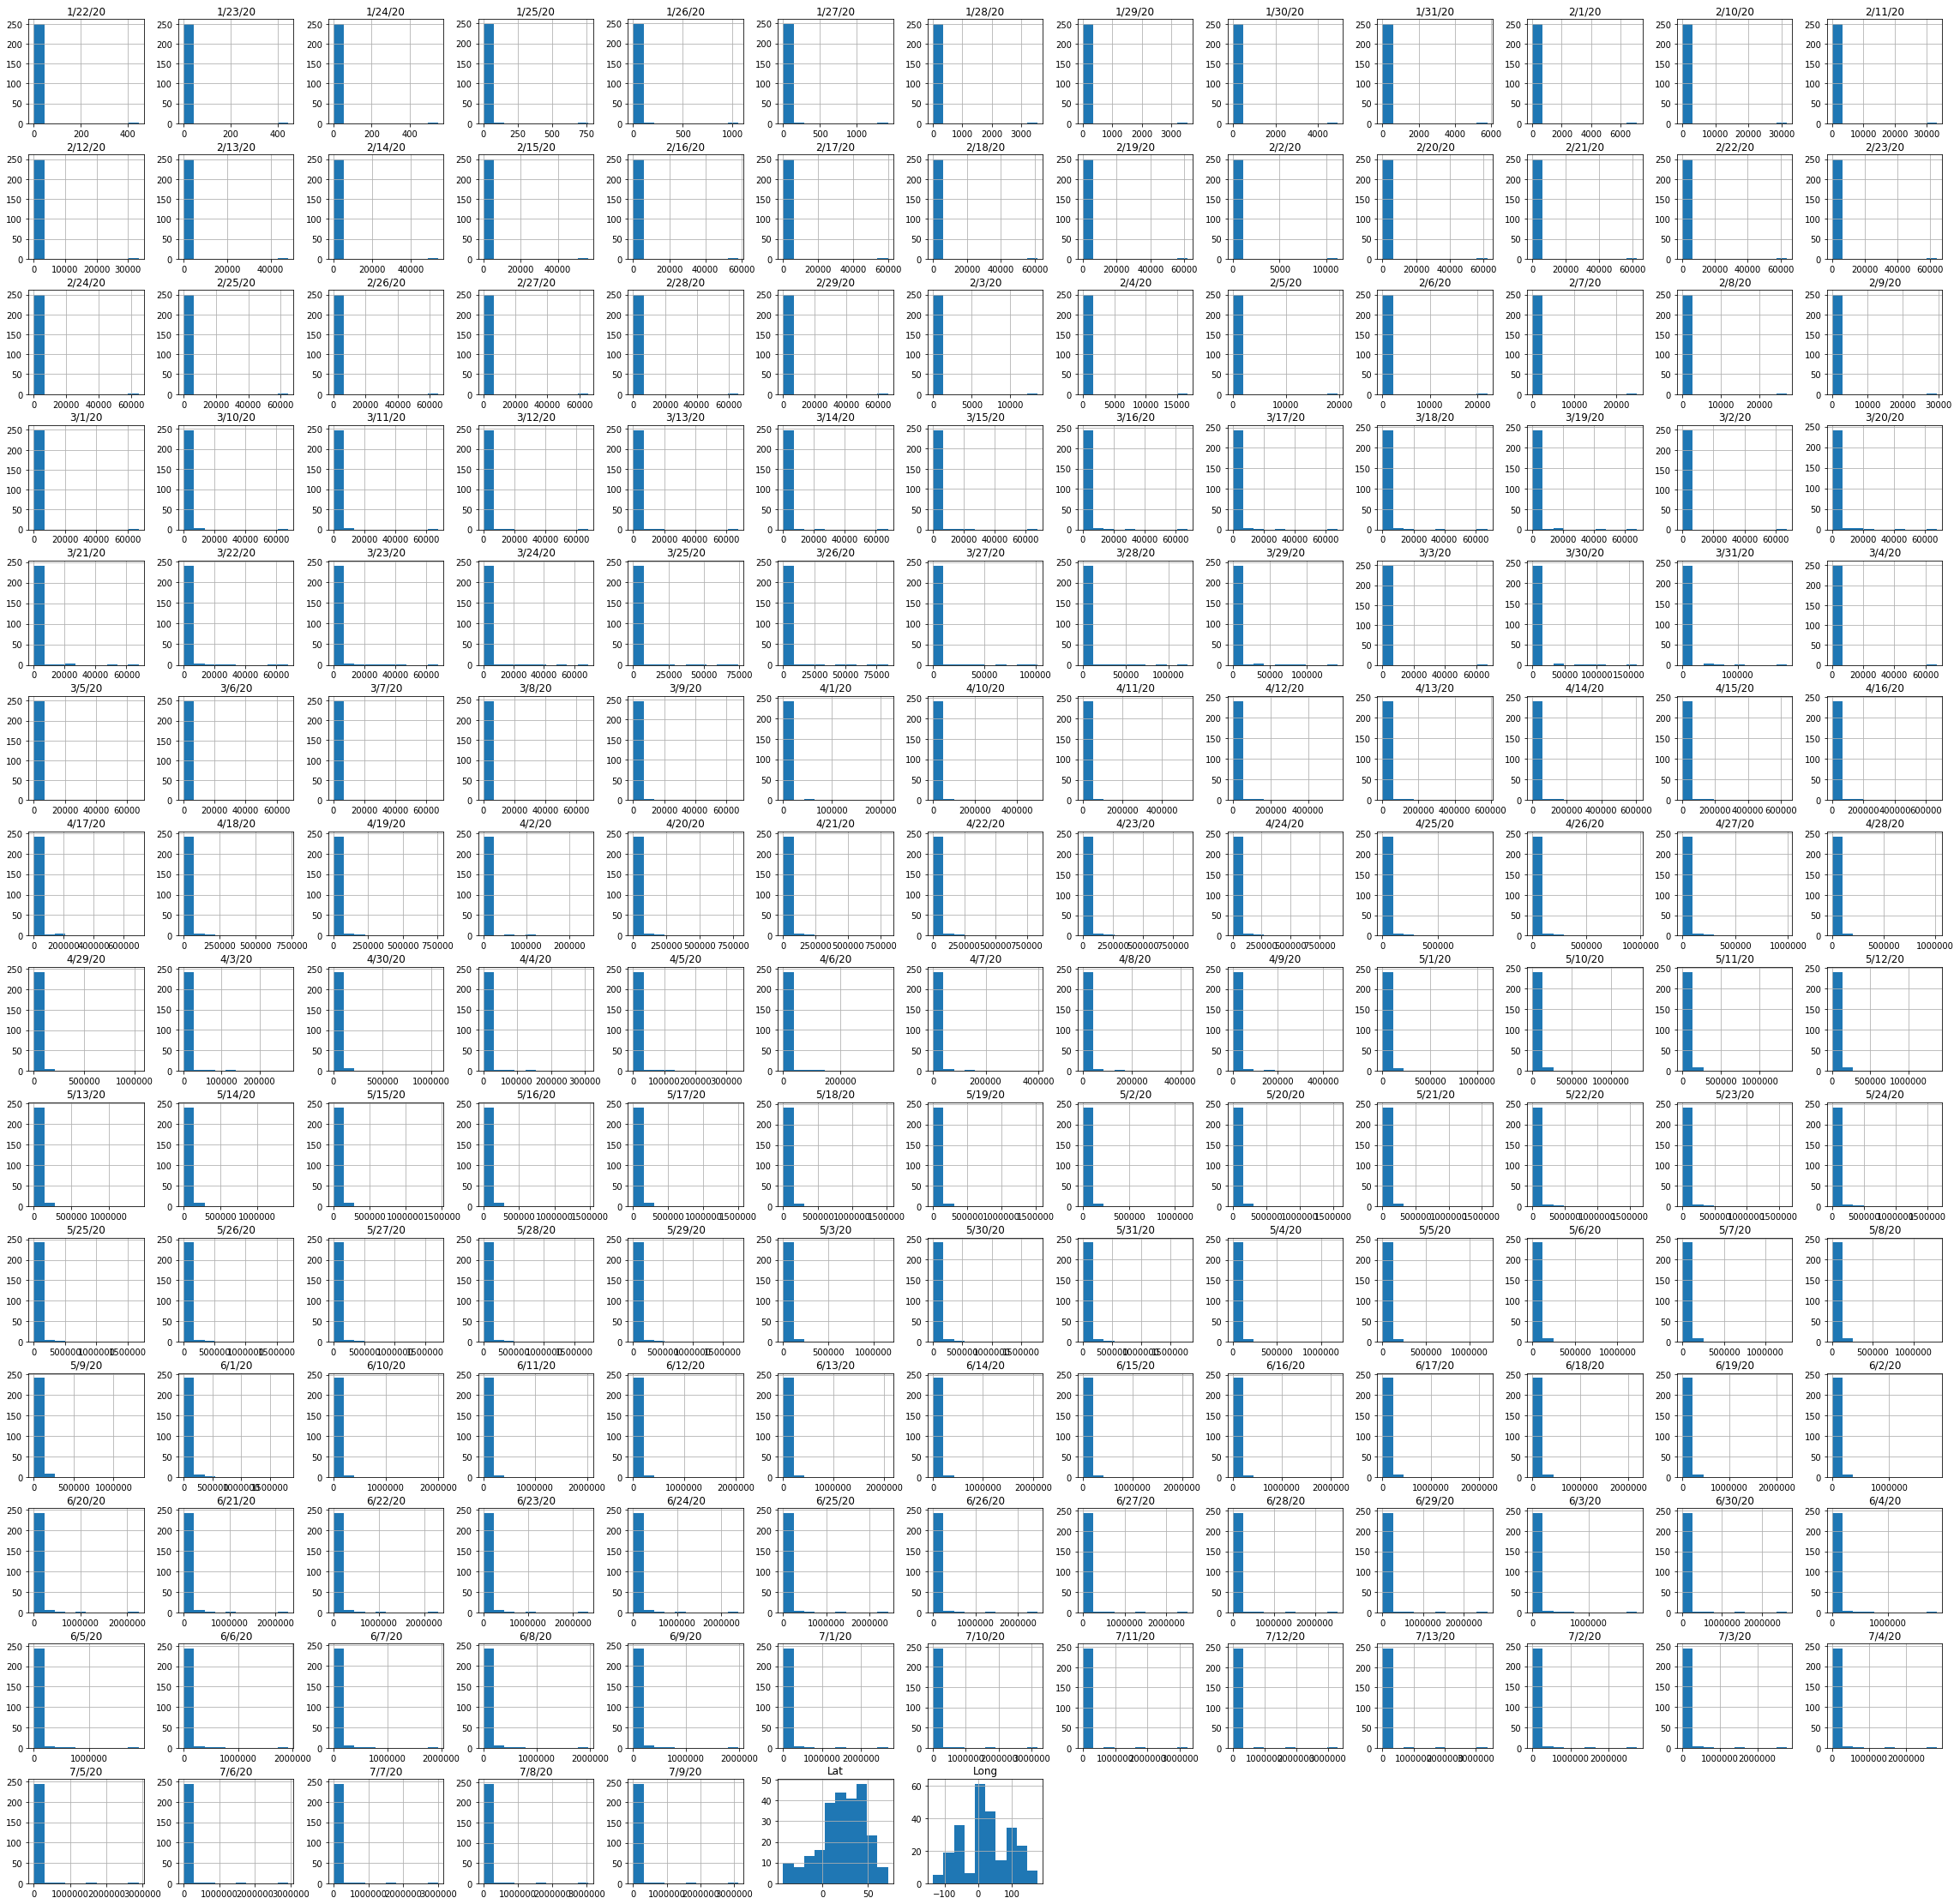

In [18]:
train_data.hist(figsize=(40,40))
plt.show

In [19]:
train_data.corr()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
Lat,1.000000,-0.139908,0.027727,0.032212,0.036616,0.041213,0.043762,0.045081,0.035216,0.038567,...,0.022063,0.021175,0.020521,0.019164,0.017906,0.016626,0.015403,0.014232,0.013521,0.013074
Long,-0.139908,1.000000,0.097977,0.115505,0.132999,0.145902,0.154261,0.158345,0.122756,0.135184,...,-0.124402,-0.124215,-0.124065,-0.124082,-0.124047,-0.124027,-0.124052,-0.124055,-0.123866,-0.123713
1/22/20,0.027727,0.097977,1.000000,0.998420,0.994058,0.990527,0.986209,0.984354,0.996694,0.992720,...,0.005412,0.005091,0.004808,0.004456,0.004115,0.003768,0.003429,0.003120,0.002861,0.002610
1/23/20,0.032212,0.115505,0.998420,1.000000,0.997993,0.995367,0.992241,0.990271,0.997908,0.996344,...,0.002569,0.002251,0.001969,0.001627,0.001294,0.000953,0.000623,0.000320,0.000068,-0.000179
1/24/20,0.036616,0.132999,0.994058,0.997993,1.000000,0.998395,0.996455,0.995007,0.996874,0.997382,...,0.000869,0.000551,0.000270,-0.000067,-0.000396,-0.000732,-0.001056,-0.001356,-0.001605,-0.001846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,0.016626,-0.124027,0.003768,0.000953,-0.000732,-0.003695,-0.003485,-0.005163,-0.000869,-0.002911,...,0.999681,0.999787,0.999852,0.999935,0.999983,1.000000,0.999984,0.999939,0.999877,0.999793
7/10/20,0.015403,-0.124052,0.003429,0.000623,-0.001056,-0.004011,-0.003795,-0.005470,-0.001197,-0.003232,...,0.999527,0.999657,0.999742,0.999856,0.999936,0.999984,1.000000,0.999985,0.999945,0.999879
7/11/20,0.014232,-0.124055,0.003120,0.000320,-0.001356,-0.004305,-0.004086,-0.005758,-0.001499,-0.003529,...,0.999344,0.999500,0.999608,0.999751,0.999859,0.999939,0.999985,1.000000,0.999986,0.999942
7/12/20,0.013521,-0.123866,0.002861,0.000068,-0.001605,-0.004549,-0.004323,-0.005995,-0.001752,-0.003777,...,0.999174,0.999356,0.999488,0.999648,0.999775,0.999877,0.999945,0.999986,1.000000,0.999985


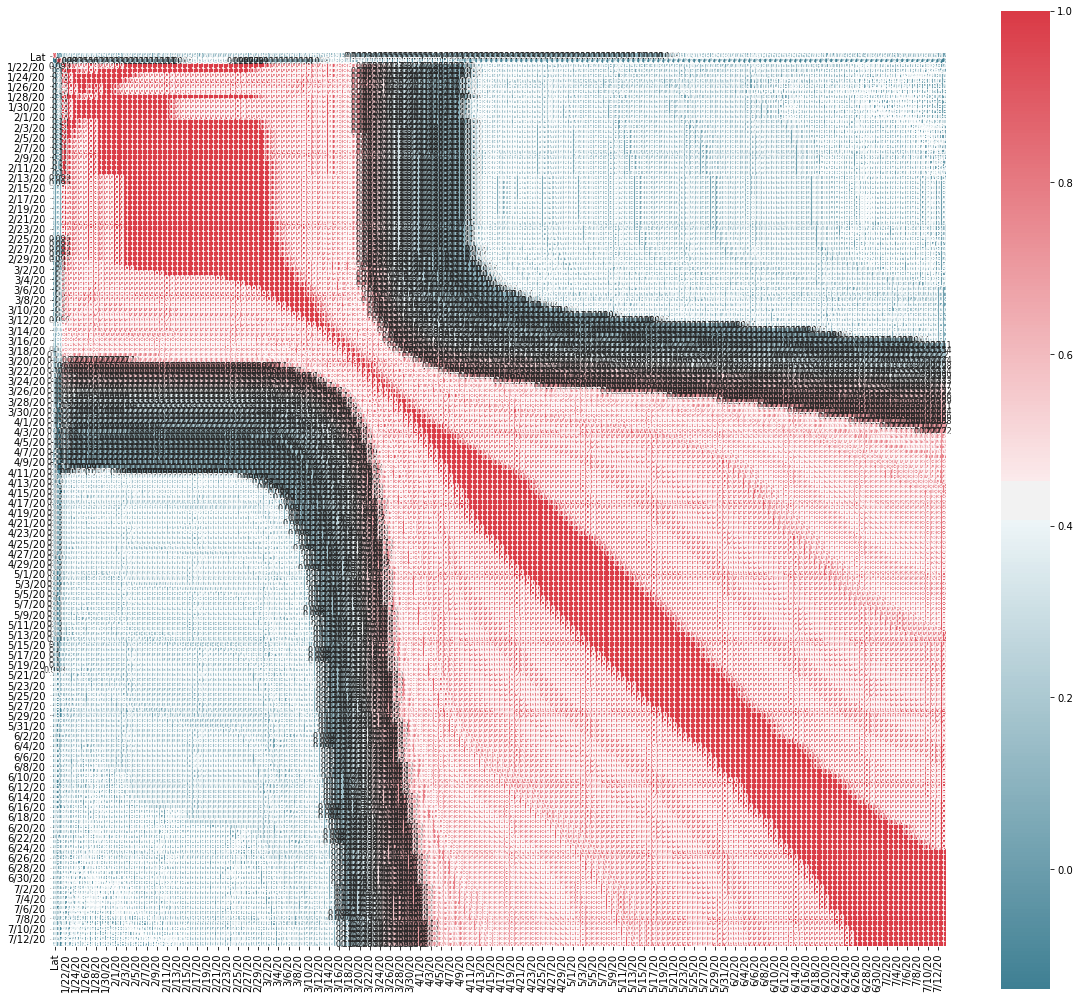

In [21]:
#plot co-relation heat map

def plot_correlation_map( HEAT_MAP ):
    corr = train_data.corr()
    _ , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sb.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8 }
    )
plot_correlation_map( train_data )

In [22]:
train_data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [23]:
train_data.tail()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
245,Canada,64.282300,-135.000000,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
246,Kosovo,42.602636,20.902977,0,0,0,0,0,0,0,...,3064,3356,3508,3703,3886,4100,4307,4715,4931,5118
247,Burma,21.916200,95.956000,0,0,0,0,0,0,0,...,313,313,316,316,317,321,326,330,331,336
248,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
249,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8


In [25]:
X=train_data
print(X)

     Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  \
0       Afghanistan  33.939110   67.709953        0        0        0   
1           Albania  41.153300   20.168300        0        0        0   
2           Algeria  28.033900    1.659600        0        0        0   
3           Andorra  42.506300    1.521800        0        0        0   
4            Angola -11.202700   17.873900        0        0        0   
..              ...        ...         ...      ...      ...      ...   
245          Canada  64.282300 -135.000000        0        0        0   
246          Kosovo  42.602636   20.902977        0        0        0   
247           Burma  21.916200   95.956000        0        0        0   
248  United Kingdom  18.220600  -63.068600        0        0        0   
249  United Kingdom  18.420700  -64.640000        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  ...  7/4/20  7/5/20  7/6/20  7/7/20  \
0          0        0        0        0  ..

In [31]:
y=X.iloc[:,[0]]

In [32]:
y.head()

,Country/Region
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [33]:

#FeatureScalling
#MinMaxScaler
import pandas,scipy,numpy
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
rescaledX[0:5,:]

ValueError: could not convert string to float: 'Afghanistan'

In [ ]:
df["A"] = pd.to_numeric(df["A"], downcast="float")

In [34]:
y['Country/Region']

0         Afghanistan
1             Albania
2             Algeria
3             Andorra
4              Angola
            ...      
245            Canada
246            Kosovo
247             Burma
248    United Kingdom
249    United Kingdom
Name: Country/Region, Length: 250, dtype: object

In [36]:
y['Country/Region']=pd.to_numeric(y['Country/Region'],downcast='int')

ValueError: invalid downcasting method provided